In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from scipy.stats import norm, multivariate_normal
import scipy.integrate as integrate

# Optimal Bayes Classifier

This is a exploratory study on Bayes Classifier motivated by exercise 2.2 of *Elements of Statistical learning* book. 

We have the following data generating process:

> *(...) First we generated 10 means mk from a bivariate Gaussian distribution N((1, 0), ***I***) and labeled this class BLUE. Similarly, 10 more were drawn from N((0, 1), ***I***) and labeled class ORANGE. Then for each class we generated 100 observations as follows: for each observation, we picked an mk at random with probability 1/10, and then generated a N(mk, ***I***/5), thus leading to a mixture of Gaussian clusters for each class. (...)*

In this notebook we're interested in obtaining an expression for Bayes Classifier, visualize its decision boundary and compute both it's theoretical and experimental accuracy through a dataset generated following the process descripted above.

### Generating the data

In [10]:
blue_means   = np.random.multivariate_normal([1, 0], np.identity(2), 10)
orange_means = np.random.multivariate_normal([0, 1], np.identity(2), 10)

In [11]:
def generate_observations(n):
    blue_observations = np.array([])
    orange_observations = np.array([])
    for i in range(n):        
        blue_observations = np.append(blue_observations, np.random.multivariate_normal(random.choice(blue_means), np.identity(2)/5))
        orange_observations = np.append(orange_observations, np.random.multivariate_normal(random.choice(orange_means), np.identity(2)/5))
    blue_observations.shape = (n, 2)    
    orange_observations.shape = (n, 2)
    return blue_observations, orange_observations

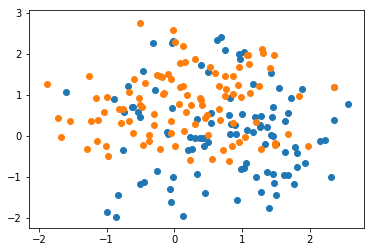

In [12]:
blue_observations, orange_observations = generate_observations(100)
plt.scatter(blue_observations[:, 0], blue_observations[:, 1])
plt.scatter(orange_observations[:, 0], orange_observations[:, 1])
plt.show()

### Bayes optimal classifier

Let `Pi` denote the prior probability that a pattern from class `i` occurs; and `fi(x)` the probability density of the feature vectors that originate from patterns from class `i`. We also let `f(x)` the total density probability of the feature vectors$$f(x) = \sum_{i=1}^C P_if_i(x)$$ where C represents the number of classes. The posterior probability that an observed feature vector `x` belongs to class `i` can be obtained from Bayes theorem as:

$$\hat{P}_i(x) = Pr(i | x) = \frac{f_i(x)P_i}{f(x)} $$

The Bayes Classifier is given by:

$$\hat{G}(x) = \max\limits_{{1 \leq i \leq C}} \hat{P}_i(x)$$

And it's accuracy is given by:

$$Accuracy = \int \hat{G}(x)f(x)dx$$

In [19]:
def f1(x): # density function for inputs originated from class blue
    p = 0
    for i in blue_means:
        p += multivariate_normal.pdf(x, mean=i, cov=np.identity(2)/5)
    return p/len(blue_means)

def f2(x): # density function for inputs originated from class orange
    p = 0
    for i in orange_means:
        p += multivariate_normal.pdf(x, mean=i, cov=np.identity(2)/5)
    return p/len(orange_means)

P1 = 0.5 # prior probability that a pattern from class blue occurs
P2 = 0.5 # prior probability that a pattern from class orange occurs

def f(x): # total density function for inputs 
    return P1*f1(x) + P2*f2(x)

def p_hat_1(x):
    return (f1(x)/f(x))*P1

def p_hat_2(x):
    return (f2(x)/f(x))*P2

def optimal_bayes_classifier(x):
    if p_hat_1(x) >= 0.5:
        return "blue"
    return "orange"

def theoretical_accuracy(): # TODO: improve integral computation, for now, we're integrating from (-5,-5) to (5,5) with 0.01 area size
    y = []
    for i in range(-50, 50):
        for j in range(-50, 50):
            y.append(f([i/10,j/10])*max(p_hat_1([i/10,j/10]),p_hat_2([i/10,j/10])))    
    return sum(y)/100

def experimental_accuracy(blue_observations, orange_observations):
    correct_predictions = 0
    for x_blue, x_orange in zip(blue_observations, orange_observations):
        if optimal_bayes_classifier(x_blue) == "blue":
            correct_predictions += 1
        if optimal_bayes_classifier(x_orange) == "orange":
            correct_predictions += 1
    return correct_predictions/(len(blue_observations) + len(orange_observations))
    
        

### Experimental accuracy x Theoretical accuracy

Let's generate a bigger dataset and see how Bayes classifier perform:

In [20]:
blue_observations, orange_observations = generate_observations(10000)

In [22]:
print("Theoretical Accuracy: ", "{:.4f}".format(theoretical_accuracy()))
print("Experimental Accuracy: ", "{:.4f}".format(experimental_accuracy(blue_observations, orange_observations)))

Theoretical Accuracy:  0.7632
Experimental Accuracy:  0.7601


### Decision Boundary

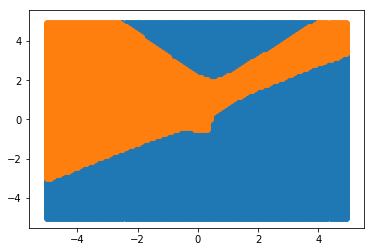

In [21]:
blue_predictions = np.array([])
orange_predictions = np.array([])

for i in range(-50, 50):
    for j in range(-50, 50):        
        prediction = optimal_bayes_classifier([i/10, j/10])
        if prediction == "blue":
            blue_predictions = np.append(blue_predictions, [i/10,j/10])
        else:
            orange_predictions = np.append(orange_predictions, [i/10,j/10])

blue_predictions.shape = (int(len(blue_predictions)/2), 2)
orange_predictions.shape = (int(len(orange_predictions)/2), 2)

plt.scatter(blue_predictions[:,0], blue_predictions[:,1])
plt.scatter(orange_predictions[:,0], orange_predictions[:,1])
plt.show()